# Hello Computer Vision world

Let's try to learn a bit about computer vision.

In [29]:
import cv2 #import openCV library
import matplotlib.pyplot as plt
import numpy as np

import os

In [3]:
os.chdir('/home/armanubuntu/computer-vision-stuff/computer-vision-stuff')

Load and visualize an image:

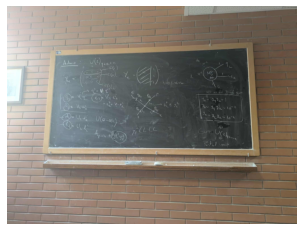

In [ ]:
img = cv2.imread('lastmeeting.jpg')

#print(img) # prints the array representation of the image; each pixel is represented by 3 values (BGR)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cvtColor stands for Convert Color, from BGR to RGB, as OpenCV uses BGR by default, but matplotlib uses RGB
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


Play with transformations:

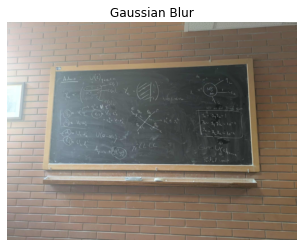

In [26]:
blur = cv2.GaussianBlur(img_rgb, (5,5), 0)
plt.imshow(blur)
plt.axis('off')
plt.title('Gaussian Blur')
plt.show()

The blur option applies a Gaussian filter - a smoothing operation that reduces image noise and detail. \
Each pixel is replaced by a weighted average of its neighbors, where nearby pixels count more than the distant ones. The weights come from a Gaussian. \
The (5,5) represents the size of the kernel; i.e. a 5x5 pixel neighborhood is taken. \
The 0 represents the value of $\sigma$ of the Gaussian, but if $\sigma = 0$ then openCV computes $\sigma$ automatically from the kernel size.

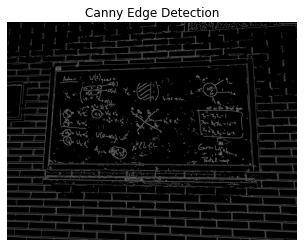

In [28]:
edges = cv2.Canny(blur, 40, 50) # Canny Edge Detection on the blurred image. The two values are the min and max thresholds for edge detection

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Canny Edge Detection')
plt.show()

This finds the edges (boundaries of objects) in an image — points where the brightness changes sharply. \
The output is a binary image (black–white): \
White pixels → detected edges. \
Black pixels → everything else. 

The first number is the	lower threshold for edge detection, and the second is the upper threshold. \
The thresholds control sensitivity: \
Lower → detect more (including faint) edges. \
Higher → detect only strong edges. 


The Canny algorithm actually performs five steps under the hood: 
+ Noise reduction using Gaussian blur
(That’s why we often do the blur manually first — to control it).

+ Gradient computation — measures how fast intensity changes in x/y directions.

+ Edge strength & direction — combine gradients into a single “magnitude” image.

+ Non-maximum suppression — thins wide edges to a single pixel line.

+ Hysteresis thresholding — uses the two thresholds to decide which gradients are “real edges”.

🧪 Visual demo: Effect of blurring on edge detection

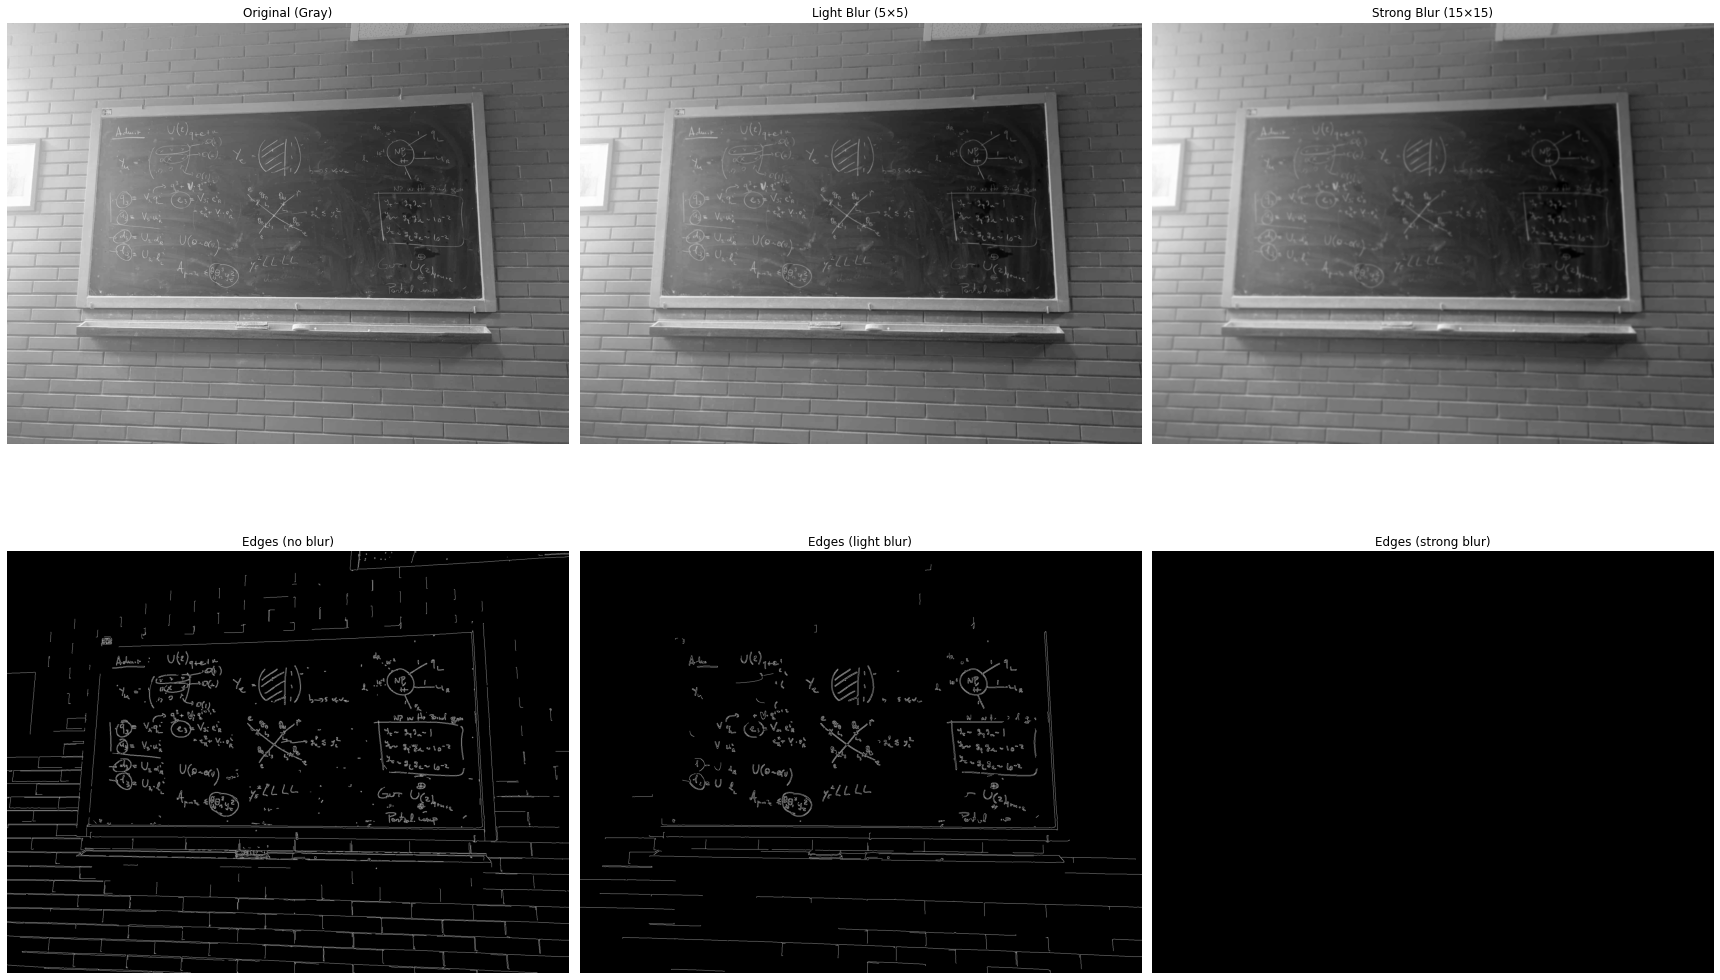

In [31]:
# 1. Read and convert to grayscale
img_bgr = cv2.imread(cv2.samples.findFile("lastmeeting.jpg"))  
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# 2. Apply different amounts of blur
blur_none = gray
blur_light = cv2.GaussianBlur(gray, (5,5), 0)
blur_strong = cv2.GaussianBlur(gray, (15,15), 0)

# 3. Run Canny edge detection on each version
edges_none = cv2.Canny(blur_none, 100, 200)
edges_light = cv2.Canny(blur_light, 100, 200)
edges_strong = cv2.Canny(blur_strong, 100, 200)

# 4. Show results
fig, axs = plt.subplots(2, 3, figsize=(24,16))
axs = axs.ravel()

titles = [
    "Original (Gray)", "Light Blur (5×5)", "Strong Blur (15×15)",
    "Edges (no blur)", "Edges (light blur)", "Edges (strong blur)"
]
images = [gray, blur_light, blur_strong,
           edges_none, edges_light, edges_strong]

for ax, img, title in zip(axs, images, titles):
    cmap = 'gray' if len(img.shape)==2 else None
    ax.imshow(img, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


In the no-blur version, edges are noisy and fragmented — you’ll see spurious white lines from texture or small shadows.\
With light blur (5×5), the edges become cleaner and more continuous.\
With too strong blur (15×15), edges start to fade or disappear — fine detail is lost.\
So there’s a sweet spot: just enough smoothing to remove noise, but not so much that you erase structure.
This picture is maybe not the best example but okay! Very interesting to see. 

So the combination of Blur + Canny algorithm is the basic thing done in CV.